<a href="https://colab.research.google.com/github/NahomiHM/Investigaci-n-de-operaciones-/blob/main/Probabilidad_del_tablero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio
Supongamos que tenemos en un tablero cuatro sectores. Lanzamos dos monedas y avanzamos en sentido horario, el numero de caras que aparezcan.
  Resultados posibles cc, cx, xc, xx.



  
  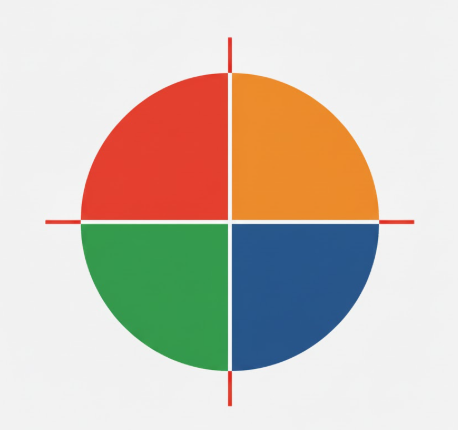

Dado que el proceso de moverse de un sector a otro es probabilístico y el futuro estado depende solo del estado actual (el sector donde se encuentra el jugador), este sistema se ajusta a la definición de una Cadena de Markov




*   xn = La probabilidad de estar en el sector naranja tras n lanzamientos

*   yn = La probabilidad de estar en el sector azul  tras n lanzamientos


*   zn = La probabilidad de estar en el sector verde  tras n lanzamientos


*   tn = La probabilidad de estar en el sector rojo tras n lanzamientos



• Si el jugador está en el Sector naranja:

    * La probabilidad de quedarse en naranja es 1/4.
    * La probabilidad de moverse a azul  es 0.
    * La probabilidad de moverse a verde es 1/4.
    *  La probabilidad de moverse a rojo es 1/2.




• Si el jugador está en el Sector azul:

    * La probabilidad de quedarse en naranja es 2/4.
    * La probabilidad de moverse a azul  es 1/4.
    * La probabilidad de moverse a verde es 0.
    *  La probabilidad de moverse a rojo es 1/4.

• Si el jugador está en el Sector verde:

    * La probabilidad de quedarse en naranja es 1/4.
    * La probabilidad de moverse a azul  es 1/2.
    * La probabilidad de moverse a verde es 1/4.
    *  La probabilidad de moverse a rojo es 0.

• Si el jugador está en el Sector rojo:

    * La probabilidad de quedarse en naranja es 0.
    * La probabilidad de moverse a azul  es 1/4.
    * La probabilidad de moverse a verde es 1/2.
    *  La probabilidad de moverse a rojo es 1/4.

Todo lo de arriba nos ayudara a formar nuestra matriz de transiscion, lo que haremos es un  programa para calcular las probabilidades x_n, y_n, z_n, t_n y graficarlas

---



In [206]:
# Importamos las librerías
# numpy es para operaciones numéricas, especialmente con matrices.
# matplotlib.pyplot es para crear gráficas.
import numpy as np
import matplotlib.pyplot as plt

# Definimos la matriz de transición  del problema con lo ya calculado anteriormente .
# Cada fila representa el estado de destino y cada columna el estado de origen
A = np.array([
    [1/4, 0,   1/4, 2/4],
    [2/4, 1/4, 0,   1/4],
    [1/4, 2/4, 1/4, 0  ],
    [0,   1/4, 2/4, 1/4]
])

# Definimos un estado inicial X_0.
# Asumimos que al inicio (n=0), estamos 100% seguros de estar en el sector 'x'.
# El resultado a largo plazo no depende de este estado inicial.
X0 = np.array([
    [1],  # Probabilidad inicial de x
    [0],  # Probabilidad inicial de y
    [0],  # Probabilidad inicial de z
    [0]   # Probabilidad inicial de t
])

Hacemos la simulacion , es importante poner nuestros numeros de pasos que queremos que tenga

In [207]:

# Número de pasos que usaremos
num_pasos = 7

# Creamos una lista para guardar el historial de probabilidades en cada paso.
# estado inicial X0.
historial_X = [X0]

# El vector de probabilidad actual
X_actual = X0

# Bucle para calcular las probabilidades en cada paso recordando que empezamos con
#n=1 hasta n=num_pasos
for n in range(num_pasos):
    # La nueva probabilidad se calcula multiplicando la matriz A por el vector actual
    # X_n = A * X_{n-1}
    X_siguiente = np.dot(A, X_actual)

    # probabilidades al historial
    historial_X.append(X_siguiente)

    # Actualizamos el vector actual para la siguiente iteración
    X_actual = X_siguiente

#  convertimos la lista de vectores en una única matriz.
# La transpuesta (T) nos ayuda a separar las probabilidades de cada sector en filas.
historial_probabilidades = np.array(historial_X).reshape(num_pasos + 1, 4).T

# Extraemos la evolución de cada probabilidad en una variable separada.
prob_x = historial_probabilidades[0]
prob_y = historial_probabilidades[1]
prob_z = historial_probabilidades[2]
prob_t = historial_probabilidades[3]

# Imprimimos las probabilidades finales para ver los valores a los que convergen

#necesitamos que la suma nos de 1
print("Probabilidades finales (después de {} pasos):".format(num_pasos))
print(f"P(x) = {prob_x[-1]:.4f}")
print(f"P(y) = {prob_y[-1]:.4f}")
print(f"P(z) = {prob_z[-1]:.4f}")
print(f"P(t) = {prob_t[-1]:.4f}")
print(f"Suma de comprobación: {np.sum(X_actual):.2f}")


Probabilidades finales (después de 7 pasos):
P(x) = 0.2500
P(y) = 0.2461
P(z) = 0.2500
P(t) = 0.2539
Suma de comprobación: 1.00


Por utimo graficamos
Dando el estilo que queramos

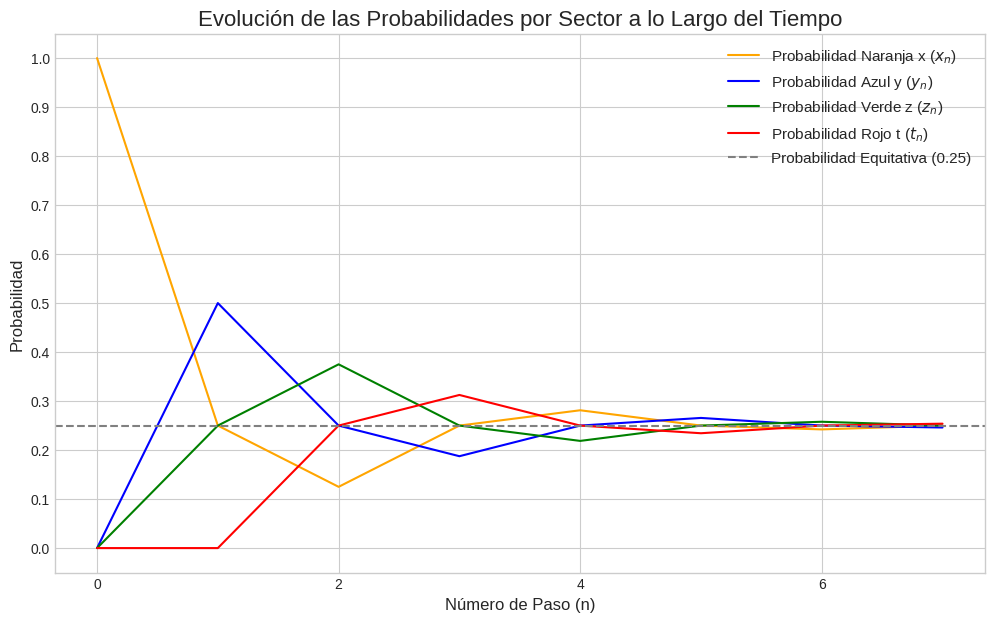

In [208]:

# estilo de la grafica
plt.style.use('seaborn-v0_8-whitegrid')

# tamaño que queremos que nuestra figura tenga
plt.figure(figsize=(12, 7))

# Rango de pasos para el eje x
eje_n = range(num_pasos + 1)

# empecemos dibujando una linea de cada sector con su respectiva probabilidad
plt.plot(eje_n, prob_x, 'orange', label='Probabilidad Naranja x ($x_n$)')
plt.plot(eje_n, prob_y, 'blue', label='Probabilidad Azul y ($y_n$)')
plt.plot(eje_n, prob_z, 'green', label='Probabilidad Verde z ($z_n$)')
plt.plot(eje_n, prob_t, 'red', label='Probabilidad Rojo t ($t_n$)')

# Añadimos una línea horizontal en 0.25 para comparar fácilmente.
plt.axhline(y=0.25, color='gray', linestyle='--', label='Probabilidad Equitativa (0.25)')

# --- Rotulación de la Gráfica ---
plt.title('Evolución de las Probabilidades por Sector a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Número de Paso (n)', fontsize=12)
plt.ylabel('Probabilidad', fontsize=12)
plt.xticks(np.arange(0, num_pasos + 1, 2)) # nos ayuds a marcar los ejes
plt.yticks(np.arange(0, 1.1, 0.1)) # marcacion de los ejes
plt.legend(fontsize=11) #  etiquetas de cada línea
plt.grid(True) # para que no nos perdamos usaremos una cuadricula

# Nos muestra la pagina
plt.show()